In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_loan = pd.read_csv('Loan Data set.csv')
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df_loan.shape

(614, 13)

In [4]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

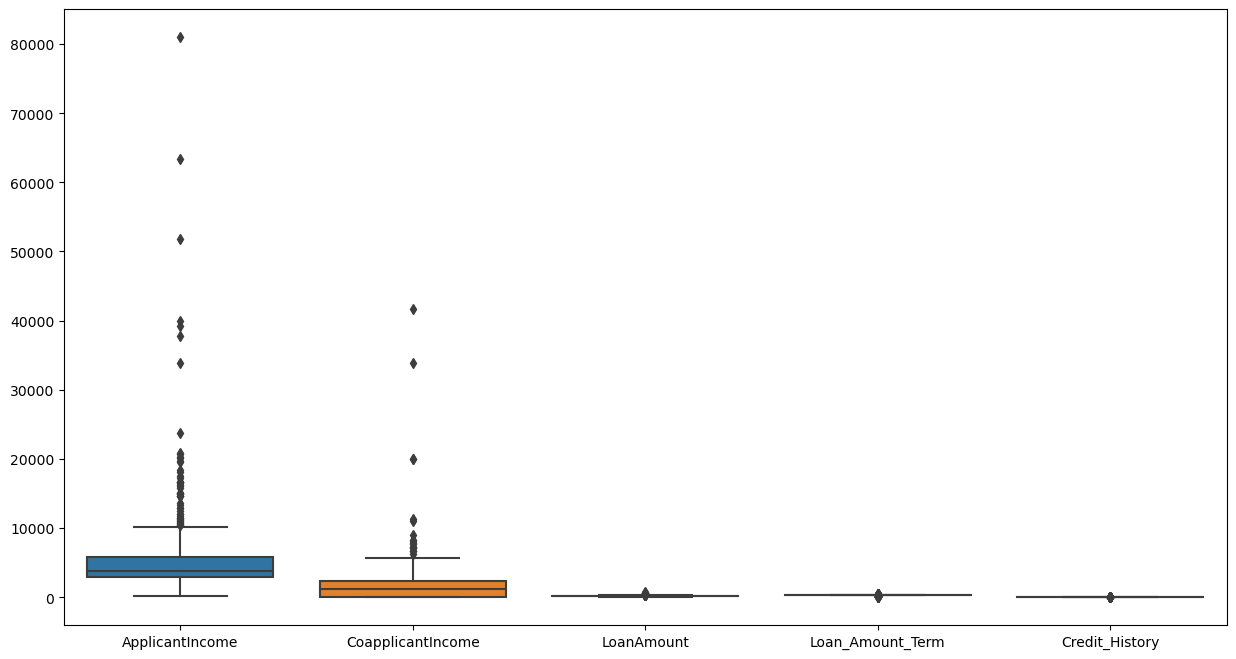

In [7]:
#checking the outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df_loan)

In [8]:
#Fill the null values of numerical datatypes
df_loan['LoanAmount']=df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].median())
df_loan['Loan_Amount_Term']=df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mean())
df_loan['Credit_History']=df_loan['Credit_History'].fillna(df_loan['Credit_History'].mean())


In [9]:
#Fill the null values of object datatypes
df_loan['Gender']=df_loan['Gender'].fillna(df_loan['Gender'].mode()[0])
df_loan['Married']=df_loan['Married'].fillna(df_loan['Married'].mode()[0])
df_loan['Dependents']=df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0])

In [10]:
df_loan['Self_Employed']=df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0])

In [11]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by Gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

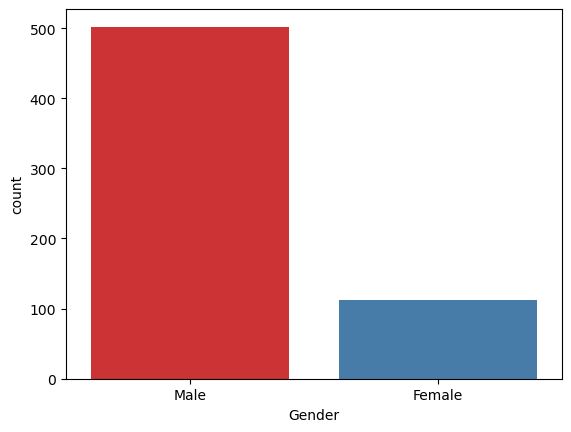

In [12]:
print('Number of people who took loan by Gender')
print(df_loan['Gender'].value_counts())
sns.countplot(x='Gender',data=df_loan,palette='Set1')

Number of people who took loan by Married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

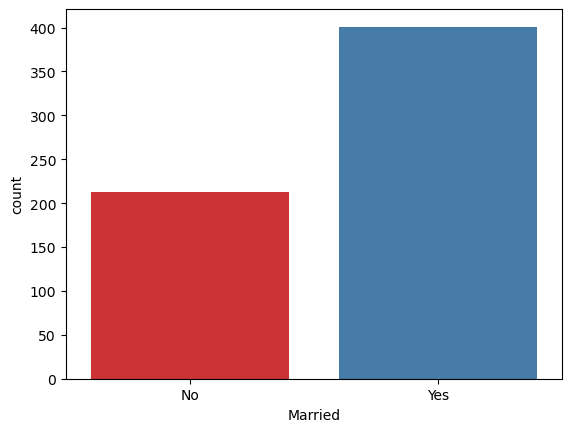

In [13]:
print('Number of people who took loan by Married')
print(df_loan['Married'].value_counts())
sns.countplot(x='Married',data=df_loan,palette='Set1')

Number of people who took loan on the basis of education.
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

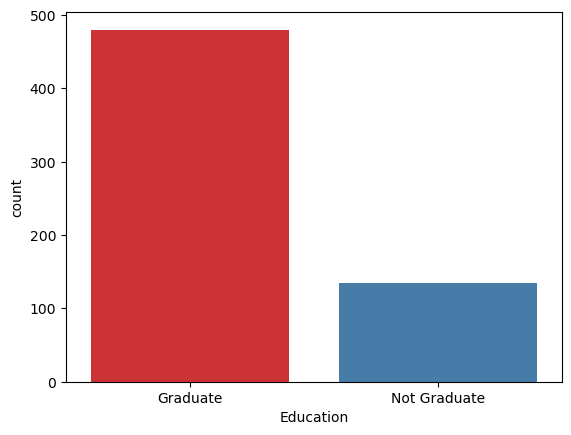

In [14]:
print('Number of people who took loan on the basis of education.')
print(df_loan['Education'].value_counts())
sns.countplot(x='Education',data=df_loan,palette='Set1')

In [15]:
# Assuming df_loan is your DataFrame
numeric_cols = df_loan.select_dtypes(include=np.number)
corr = numeric_cols.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


<Axes: >

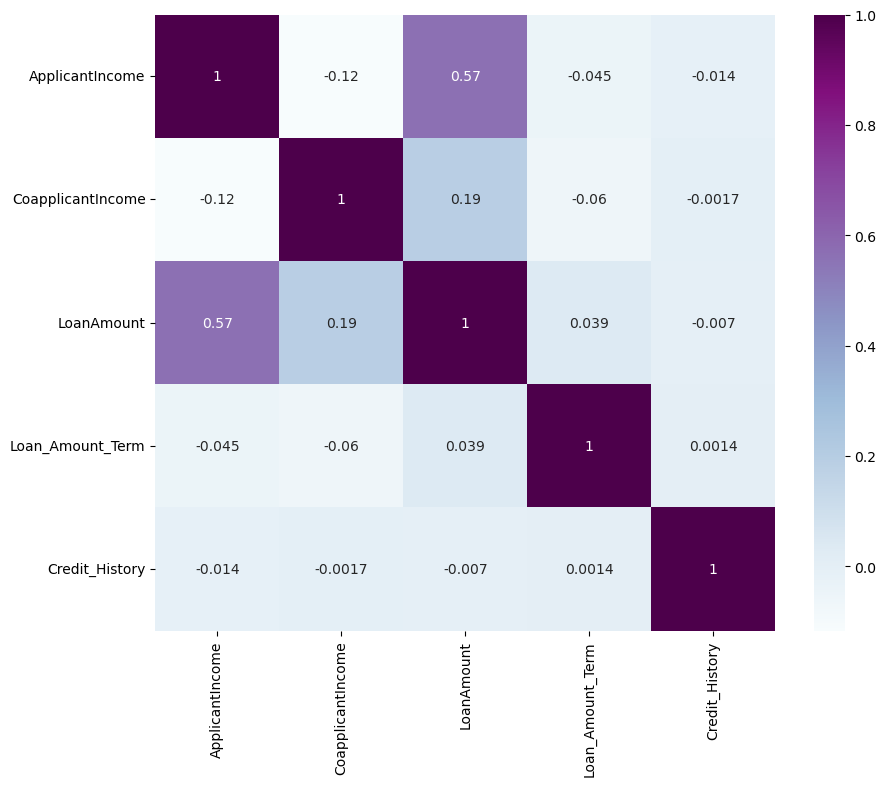

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'BuPu')

In [17]:
df_loan['Total_income'] = df_loan['ApplicantIncome'] + df_loan['CoapplicantIncome']
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

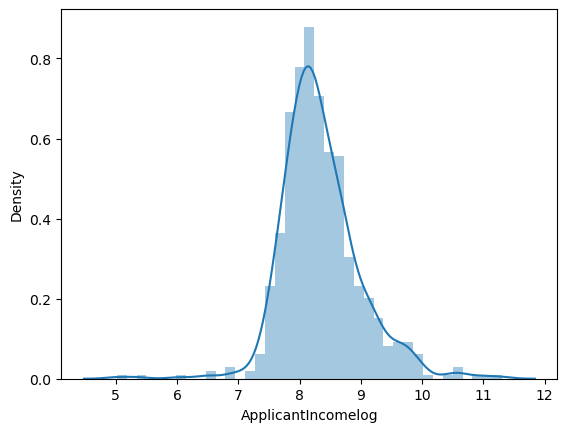

In [18]:
#Apply log Transformation

df_loan['ApplicantIncomelog'] = np.log(df_loan['ApplicantIncome']+1)
sns.distplot(df_loan['ApplicantIncomelog'],kde = True)

In [19]:
df_loan.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.000000,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.000000,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.000000,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.000000,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.000000,Urban,Y,6000.0,8.699681
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.000000,Urban,Y,9613.0,8.597482
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.000000,Urban,Y,3849.0,7.755339
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.000000,Semiurban,N,5540.0,8.018625
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.000000,Urban,Y,5532.0,8.295798
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.000000,Semiurban,N,23809.0,9.460476


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

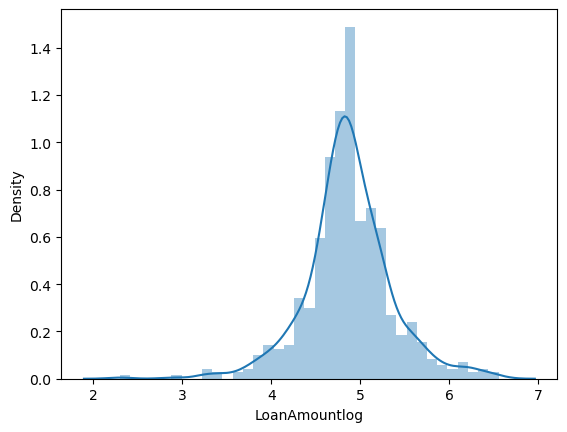

In [20]:
df_loan['LoanAmountlog'] = np.log(df_loan['LoanAmount'] + 1)
sns.distplot(df_loan['LoanAmountlog'],kde=True)

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

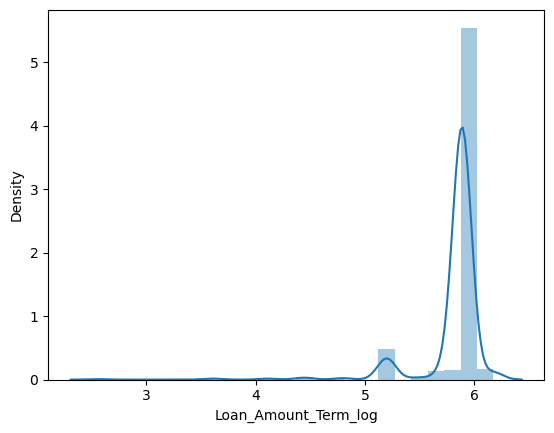

In [21]:
df_loan['Loan_Amount_Term_log'] = np.log(df_loan['Loan_Amount_Term'] + 1)
sns.distplot(df_loan['Loan_Amount_Term_log'],kde = True)

<Axes: xlabel='Total_income_log', ylabel='Density'>

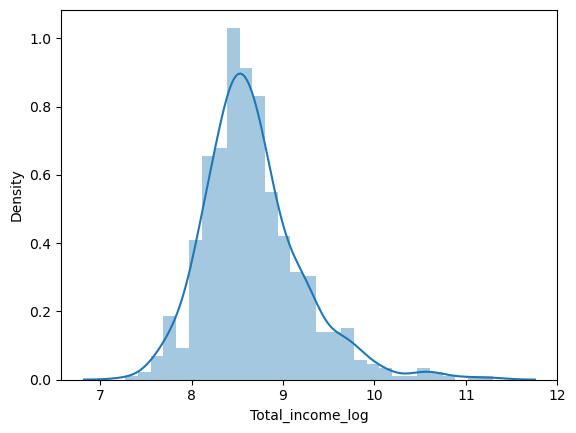

In [22]:
df_loan['Total_income_log'] = np.log(df_loan['Total_income'] + 1)
sns.distplot(df_loan['Total_income_log'],kde=True)

In [23]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [24]:
 #drop unnecessary columns
df_loan.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','Loan_ID'],axis=1,inplace=True)

In [25]:
df_loan.head(40)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_income_log
0,Male,No,0,Graduate,No,1.000000,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.000000,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.000000,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.000000,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.000000,Urban,Y,8.699681,4.955827,5.888878,8.699681
5,Male,Yes,2,Graduate,Yes,1.000000,Urban,Y,8.597482,5.590987,5.888878,9.170976
6,Male,Yes,0,Not Graduate,No,1.000000,Urban,Y,7.755339,4.564348,5.888878,8.255828
7,Male,Yes,3+,Graduate,No,0.000000,Semiurban,N,8.018625,5.068904,5.888878,8.619930
8,Male,Yes,2,Graduate,No,1.000000,Urban,Y,8.295798,5.129899,5.888878,8.618485
9,Male,Yes,1,Graduate,No,1.000000,Semiurban,N,9.460476,5.857933,5.888878,10.077861


In [26]:
#Converting Categorical values into Numericals value throuht Label Encoder or One Hot Encoder.
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df_loan['Gender']=lbe.fit_transform(df_loan['Gender'])
df_loan['Married']=lbe.fit_transform(df_loan['Married'])
df_loan['Education']=lbe.fit_transform(df_loan['Education'])
df_loan['Dependents']=lbe.fit_transform(df_loan['Dependents'])
df_loan['Self_Employed']=lbe.fit_transform(df_loan['Self_Employed'])
df_loan['Property_Area']=lbe.fit_transform(df_loan['Property_Area'])
df_loan['Loan_Status']=lbe.fit_transform(df_loan['Loan_Status'])

In [27]:
df_loan

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,1,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,1,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,1,8.933796,5.236442,5.888878,8.933796


In [28]:
df_loan.dtypes

Gender                    int32
Married                   int32
Dependents                int32
Education                 int32
Self_Employed             int32
Credit_History          float64
Property_Area             int32
Loan_Status               int32
ApplicantIncomelog      float64
LoanAmountlog           float64
Loan_Amount_Term_log    float64
Total_income_log        float64
dtype: object

In [29]:
x = df_loan.drop(columns = ['Loan_Status'],axis=1)
y = df_loan['Loan_Status']

In [30]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [31]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42,)

In [34]:
#Logistic Regression
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred_model1 = model1.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model1)

In [35]:
accuracy*100

77.27272727272727

In [36]:
#Accuracy is nothing but a ratio of the corretly predicted values to the total values.f

In [37]:
score = cross_val_score(model1,x,y,cv = 5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [38]:
np.mean(score)*100

80.9462881514061

In [39]:
##Decision tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred_model2 = model2.predict(x_test)
accuracy = accuracy_score(y_pred_model2,y_test)
print('Accuracy score of Decision tree model:', accuracy*100)

Accuracy score of Decision tree model: 72.72727272727273


In [40]:
score = cross_val_score(model2,x,y,cv = 5)
print('Cross validation score of decision tree', np.mean(score)*100)

Cross validation score of decision tree 70.03598560575769


In [41]:
#Random forest Classfier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred_model3 = model3.predict(x_test)
accuracy = accuracy_score(y_pred_model3,y_test)
print('Accuracy score of Random Forest Model.',accuracy*100)

Accuracy score of Random Forest Model. 78.57142857142857


In [42]:
#KNeighbor Model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(x_train,y_train)
y_pred_model4 = model4.predict(x_test,)
accuracy = accuracy_score(y_pred_model4,y_test)
print('Accuracy score of KNeighbor Classifier Model.',accuracy*100)

Accuracy score of KNeighbor Classifier Model. 71.42857142857143


In [43]:
score = cross_val_score(model4,x,y,cv = 3)
print('Cross validation score of KNearest Neighbors.',np.mean(score)*100)

Cross validation score of KNearest Neighbors. 73.94229236410011


In [44]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
    report =  classification_report(y_test,y_pred)
    print(f"Cassification Report for {model_name}:\n{report}\n")
generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)

Cassification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Cassification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        54
           1       0.77      0.82      0.80       100

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154


Cassification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.92      0.43      0.58        54
           1       0.76      0.98      0.86       100

    accuracy                   

In [45]:
df_loan['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [46]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
oversample = RandomOverSampler(random_state=42)
x_resampled,y_resampled = oversample.fit_resample(x,y)

df_resampled = pd.concat([pd.DataFrame(x_resampled,columns=x.columns),pd.Series(y_resampled,name='Loan_Status')],axis=1)

In [49]:
x_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_income_log
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [50]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [51]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [52]:
x_resampled_train,x_resampled_test,y_resampled_train,y_resampled_test = train_test_split(x_resampled,y_resampled,test_size=0.25,random_state=42)

In [53]:
#Logistic Regression
model1 = LogisticRegression()
model1.fit(x_resampled_train,y_resampled_train)
y_pred_model1 = model1.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

69.66824644549763

In [54]:
#Decision tree classifier
model2 = DecisionTreeClassifier()
model2.fit(x_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model2)
accuracy*100

78.19905213270142

In [55]:
#Random forest
model3 = RandomForestClassifier()
model3.fit(x_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
accuracy*100

87.67772511848341

In [56]:
#Knegihbors 
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(x_resampled_train,y_resampled_train)
y_pred_model4 = model4.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model4)
accuracy*100

72.51184834123224

In [57]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
    report =  classification_report(y_test,y_pred)
    print(f"Cassification Report for {model_name}:\n{report}\n")
    
generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model4,y_resampled_test,y_pred_model4)

Cassification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.70      0.69       211


Cassification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       114
           1       0.80      0.70      0.75        97

    accuracy                           0.78       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.78      0.78      0.78       211


Cassification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       114
           1       0.84      0.90      0.87        97

    accuracy                   

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

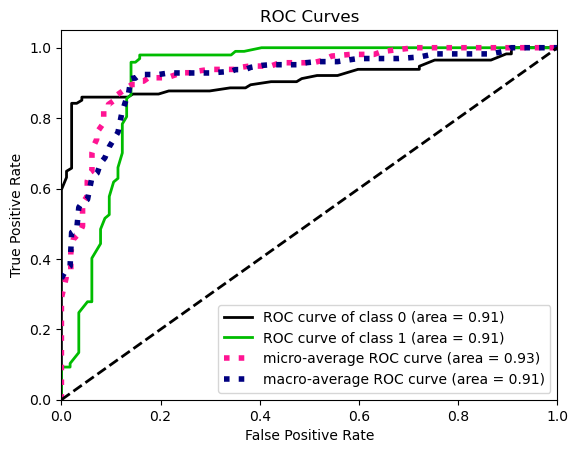

In [59]:
import scikitplot as skplt

y_probas = model3.predict_proba(x_resampled_test)
skplt.metrics.plot_roc(y_resampled_test, y_probas)
plt.show()

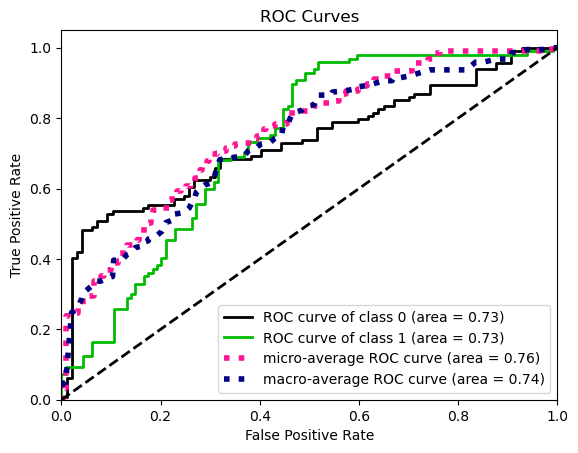

In [60]:
import scikitplot as skplt

y_probas = model1.predict_proba(x_resampled_test)
skplt.metrics.plot_roc(y_resampled_test, y_probas)
plt.show()

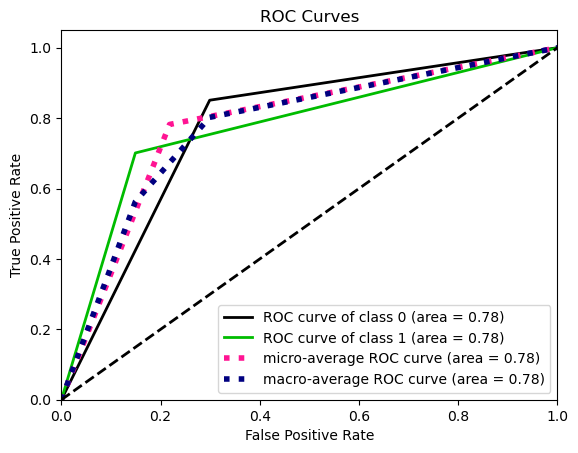

In [61]:
import scikitplot as skplt

y_probas = model2.predict_proba(x_resampled_test)
skplt.metrics.plot_roc(y_resampled_test, y_probas)
plt.show()

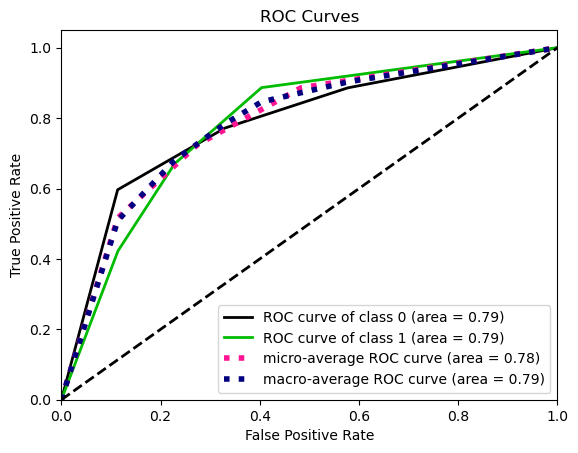

In [62]:
import scikitplot as skplt

y_probas = model4.predict_proba(x_resampled_test)
skplt.metrics.plot_roc(y_resampled_test, y_probas)
plt.show()

In [63]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [64]:
import pickle

In [65]:
print(df_loan.head())

# Save the processed DataFrame to a pickle file
with open('processed_loan_data.pkl', 'wb') as file:
    pickle.dump(df_loan, file)

# To load the DataFrame from the pickle file
with open('processed_loan_data.pkl', 'rb') as file:
    loaded_df_loan = pickle.load(file)

# Display the loaded DataFrame to verify
print(loaded_df_loan.head())

   Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  ApplicantIncomelog  LoanAmountlog  \
0              2            1            8.674197       4.859812   
1              0            0            8.430327       4.859812   
2              2            1            8.006701       4.204693   
3              2            1            7.857094       4.795791   
4              2            1            8.699681       4.955827   

   Loan_Amount_Term_log  Total_income_log  
0              5.888878          8.674197  
1              5.888878          8.714732  
2 